# Distribuciones discretas más conocidas

#### Coeficiente de Asmimetría (*Sesgo*)

$$Pearson's\ moment\ coefficient\ of\ skewness = E\left[
\left(\frac{X-\mu}{\sigma} \right)^3\right] =\ \frac{\mu_3}{\sigma^3} = \frac{ E\left[\left({X-\mu} \right)^3\right]}{{\left( E\left[(X-\mu)^2 \right]\right)}^{\frac{3}{2}}}$$

Dada cualquier variable aleatoria, tenemos cuatro funciones, sin que su nombre depende de la misma:

- `pmf(x,...) o pdf(x,...)`:  Función de probabilidad **f(k)** o de densidad **f(x)** de la variable aleatoria para los valores **k o x** del dominio:
- `cdf(x,...)`: Función de distribución  **F(x)** de la variable aleatoria para el valor **k** del dominio.
- `ppf(p,...)`: Cuantil p-ésimo de la variable aleatoria (el valor de x más pequeño tal que **F(x)** $\le$ **p).**
- `rvs(size,...)`: Generador de `size`observaciones siguiendo la distribución de la variable aleatoria.

### Distribución de Bernoulli
Si $X$ es variable aleatoria que mide el "número de éxitos" y se realiza un único experimento con dos posibles resultados (éxito, que toma valor 1, o fracaso, que toma valor 0), diremos que $X$ se distribuye como una Bernoulli con parámetro $p$,

$$X \sim \text{Be}(p)$$
donde $p$ es la probalidad de éxito y $q = 1 - p$ es la probabilidad de fracaso.
- El $\text{dominio}$ de $X $será $X\left(\Omega \right) = \{0,1\}$
- La función de probabilidad vendrá dada por
$$f(k) = p^{k}\cdot (1-p)^{1-k} = \left \{ 
                                          \begin{array}{rl}
                                          p  & \text{si } k =1
                                          \\1-p & \text{si } k= 0
                                          \\ 0 & \text{en cualquier otro caso}
                                          \end{array}\right. $$

- La funcion de distribución vendrá dada por 
$$F(k) =\left\{ 
\begin{array}{rl}
      0 & \text{si } x<0
    \\ q  & \text{si } 0\le x<1
    \\ 1 & \text{si } x\ge 1
\end{array}
\right. $$
- $Esperanza\ \ E\left(X\right) =p$
- $Varianza\ \ Var(X) = pq$

In [1]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

p = 0.7
mean, var, skew, kurt = bernoulli.stats(p, moments = "mvsk")
print("Media: %f"%mean)
print("Var: %f"%var)
print("Skew:  %f"%skew)
print("Kurt:  %f"%kurt)

Media: 0.700000
Var: 0.210000
Skew:  -0.872872
Kurt:  -1.238095


In [2]:
bernoulli.cdf([l for l in range(10)],0.7) # Función de distribucion
bernoulli.rvs(p,size=10 ) # Muestra Aleatoria
bernoulli.ppf(0.5,p) # Cuartil

1.0

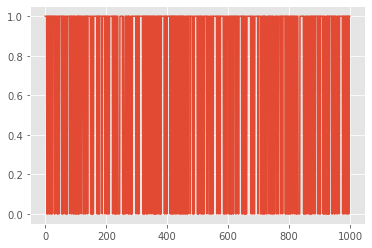

In [3]:
fig, ax = plt.subplots(1,1)
x = bernoulli.rvs(p, size=1000)
ax.plot(x)
plt.show()

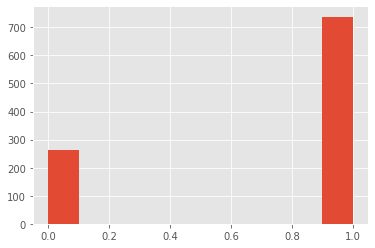

In [4]:
fig, ax = plt.subplots(1,1)
x = bernoulli.rvs(p, size=1000)
ax.hist(x)
plt.show()

### Distribución Binomial
Si $X$ es variable aleatoria que mide el "número de éxitos" y se realizan $n$ ensayos de Bernoulli independientes entre sí, diremos que $X$ se distribuye como una Binomial con parámetros $n$ y $p$,
$$X \sim \text{B}(n,p)$$
donde $p$ es la probabilidad de éxitos y $q = 1-p$ es la probabilidad de fracaso.

- El **dominio** de $X$ será $D_x = \{0,1,2,\dots,n\}$
- La **función de densidad** vendrá dada por
$$f(k) = {n \choose k }p^k(1-p)^{n-k}$$

- La **función de distribución vendrá dada por**
$$F(x) = \left\{ 
\begin{array}{r}
  0 & \text{si } x<0
\\ \sum_{k=0}^x f(k) & \text{si } 0 \le x <n
\\ 1 & \text{si } x \ge n
\end{array}
\right.$$

- **Esperanza** E(X) = np
- **Varianza** Var(x) = npq

Nota: La distribución de Bernoulli es un caso particular de la Binomial. Basta n=1 y tendremos que $X \sim \text{Be}(p) y X\sim \text{B}(1,p) \text{ son equivalentes}.$

In [5]:
from scipy.stats import binom
import matplotlib.pyplot as plt
from matplotlib import style 
style.use("ggplot")
import numpy as np 

n=7
p = 0.4
mean, var, skew, kurt = binom.stats(n,p, moments = "mvsk")
print("Media: %f"%mean)
print("Var: %f"%var)
print("Skew:  %f"%skew)
print("Kurt:  %f"%kurt)

Media: 2.800000
Var: 1.680000
Skew:  0.154303
Kurt:  -0.261905


<function matplotlib.pyplot.show(*args, **kw)>

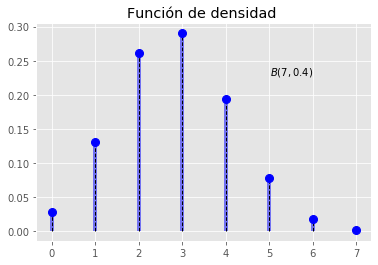

In [6]:
fig, ax =plt.subplots(1,1)

x = np.arange(0,8)
ax.plot(x, binom.pmf(x,n,p),"bo", ms=8)
ax.vlines(x,0.0,binom.pmf(x,n,p), color="b", lw=4, alpha=0.5) # Asignas los puntos en x y después donde empieza y termina
ax.set_title("Función de densidad ")
ax.text(5.02,.23,r"$B(7,0.4$)",size=10)

rv = binom(n,p) #Distribución binomial
ax.vlines(x,0,rv.pmf(x), color="k", linestyle="--",lw=1,)
plt.show

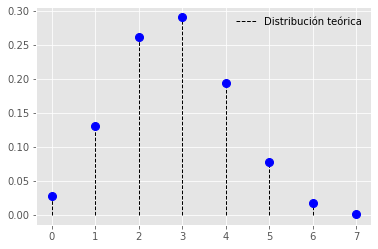

In [7]:
fig, ax =plt.subplots(1,1)
x = np.arange(0,8)
ax.plot(x, binom.pmf(x,n,p),"bo", ms=8)
rv = binom(n,p) #Distribución binomial
ax.vlines(x,0,rv.pmf(x), color="k", linestyle="--",lw=1,label="Distribución teórica")
plt.legend(loc="best", frameon=False)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

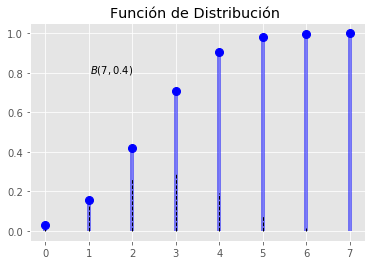

In [8]:
fig, ax =plt.subplots(1,1)

x = np.arange(0,8)
ax.plot(x, binom.cdf(x,n,p),"bo", ms=8)
ax.vlines(x,0.0,binom.cdf(x,n,p), color="b", lw=4, alpha=0.5) # Asignas los puntos en x y después donde empieza y termina
ax.set_title("Función de Distribución ")
ax.text(1.02,.8,r"$B(7,0.4$)",size=10)

rv = binom(n,p) #Distribución binomial
ax.vlines(x,0,rv.pmf(x), color="k", linestyle="--",lw=1,)
plt.show

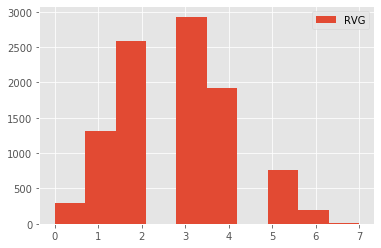

In [9]:
fix,ax = plt.subplots(1,1)
r = binom.rvs(n,p,size=10000)
ax.hist(r, label="RVG")
plt.legend(loc="best")
plt.show()

In [10]:
binom.ppf(p,n,0.5) # Cuartil

3.0

## Distribución Geométrica 

Si $X$ es variable aleatoria que mide el "número de repeticiones independientes del experimento hasta haber conseguido éxito", diremos que $X$ se distribuye como una Geométrica con parámetro $p$,
$$X \sim \text{Ge}(p)$$
donde $p$ es la probabiliad de éxito y $q = 1- p$ es la probabilidad de fracaso.
- El **dominio** de $X$ será $D_x = \{0,1,2,\dots\}$ o bien $D_x=\{1,2,\dots\}$ en función de si empieza en 0 o en 1, respectivamente.
- La **función de densidad** vendrá dada por
$$f(k) = (1 - p)^k p\    \ \text{     si empieza en 0}
\\ f(k) = ( 1 -p)^{k-1}p \text{ si empieza en 1}$$

- La **función de distribución** vendrá dada por
$$ F(x)= \left\{
\begin{array}{cl}
0 & \text{si } x < 0
\\ 1 - (1-p)^{k+1} & \text{si } k\le x < k+1, k \in \mathbb{N}
\end{array}
\right.$$
- **Esperanza** E(X) = $\frac{1-p}{p}$ si empieza en 0 y $E(X) = \frac{1}{p}$ si empieza en 1
- **Varianza** Var(X) =$\frac{1-p}{p^2}$

- **Propiedad de la falta de memoria**. Si $X$ es una v.a. \text{Ge}(p), entonces, 
$$p\{ X \ge m + n : X \ge n\} = p\{X \ge m\} \forall m,n =0,1, \dots$$

Media: 3.333333
Var: 7.777778
Skew:  2.031889
Kurt:  6.128571


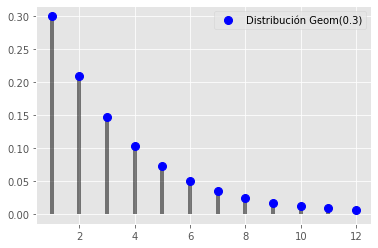

In [11]:
from scipy.stats import geom
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1)
p = .3
mean, var, skew, kurt = geom.stats(p,moments= "mvsk")
print("Media: %f"%mean) # No. de veces que tiene que intentar para abrir la puerta
print("Var: %f"%var)
print("Skew:  %f"%skew)
print("Kurt:  %f"%kurt)

x = np.arange(geom.ppf(0.01,p), geom.ppf(0.99,p))
ax.plot(x, geom.pmf(x,p), "bo",ms=8, label="Distribución Geom(0.3)")
ax.vlines(x,0,geom.pmf(x,p), lw=4, alpha=.5)
ax.legend(loc="best")
plt.show()

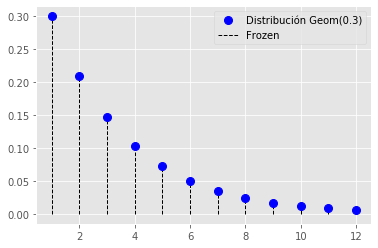

In [12]:
fig, ax = plt.subplots(1,1)
p = .3
ax.plot(x, geom.pmf(x,p), "bo",ms=8, label="Distribución Geom(0.3)")
rv = geom(p)
ax.vlines(x,0,rv.pmf(x),colors="k", linestyle="--", lw=1, label="Frozen")
ax.legend(loc="best")

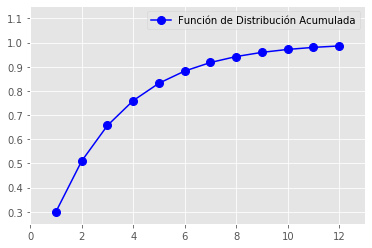

In [13]:
fig, ax = plt.subplots(1,1)
prob= geom.cdf(x,p)
ax.plot(x, prob, "bo-", ms=8, label="Función de Distribución Acumulada")
ax.axis([0,13,.25,1.15])
ax.legend(loc="best")
plt.show()

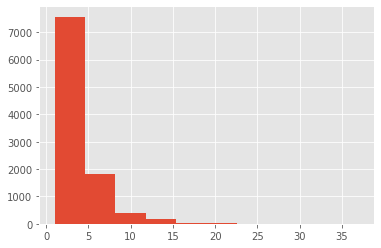

In [14]:
fig,ax = plt.subplots(1,1)
r = geom.rvs(p,size=10000)
ax.hist(r)
plt.show()

### Distribución Hipergeométrica
Consideremos el experimento "extraer a la vez (o una detrás de otra, sin retornarlos) n objetos donde hay $N$ del tipo A y $M$ del tipo B". Si $X$ es variable aleatoria que midel el "número de objetos del tipo A", diremos que $X$ se distribuye coomo una `Hipergeométrica` con parámetros $N, M, n$,
$$X\sim \text{H}(N,M,n)$$

- El **dominio** de X será $D_x = \{0,1,2,\dots,N\}$ (en general)
- La **función de densidad** vendrá dada por
    $$f(k)=\frac{{N\choose k}{M\choose n-k}}{{N+M \choose n}}$$
    
- La **función de distribución** vendrá dada por
$$F(x) = \left\{
\begin{array}{cl}
0 & \text{si } x < 0
\\ \sum_{k=0}^x f(k) & \text{si } 0 \le x < n
\\ 1 & \text{si } x \ge n
\end{array}
\right.$$

- **Esperanza** $E(X) = \frac{nN}{N+M}$
- **Varianza** $Var(X) = \frac{nNM}{(N+M)^2}\cdot \frac{N+M-n}{N+M-1}$

In [15]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
from matplotlib import style 
style.use("ggplot")
import numpy as np 

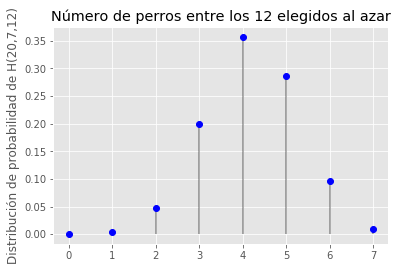

In [16]:
# Supongamos que tenemos 20 animales, de los cuales 7 son perros. Queremos medir la probabilidad de encontrar un número determinado de perros si elegimos $x=12$ animales al azar.
M=20 #No. de animales
n=7 # No. de Perros
N= 12 # No. de extracciones
rv=hypergeom(M,n,N)
x = np.arange(0+n+1)
y = rv.pmf(x)
fig, ax = plt.subplots(1,1)
ax.plot(x,y,"bo")
ax.vlines(x,0,y, lw=2,alpha=0.3)
ax.set_title("Número de perros entre los 12 elegidos al azar")
ax.set_ylabel("Distribución de probabilidad de H(20,7,12)")
plt.show()

In [17]:
mean, var, skew, kurt = rv.stats(moments= "mvsk")
print("Media: %f"%mean) 
print("Var: %f"%var)
print("Skew:  %f"%skew)
print("Kurt:  %f"%kurt)

Media: 4.200000
Var: 1.149474
Skew:  -0.062181
Kurt:  -0.152661


### Distribución de Poisson
Si $X$ es una variable aleatoria que mide el "número de eventos en un cierto intervalo de tiempo", diremos que $X$ se distribuye como una Poisson con parámetros $ \lambda$,
$$X \sim \text{Po}(\lambda)$$
donde $\lambda$ representa el número de veces que se espera que ocurra el evento durante un intervalo dado.

- El **dominio** de $X$ será $D_x = \{0,1,2,\dots \}$
- La **función de densidad** vendrá dada por
$$f(k) = \frac{e^{-\lambda}\cdot \lambda^k}{k!}$$

- La **función de distribución** vendrá dada por 
$$F(x) = \left \{
\begin{array}{cl}
0 & \text{si } x<0
\\ \sum_{k=0}^x & \text{si } 0\le x<n
\\ 1 & \text{si } x\ge n
\end{array}
\right.$$

- **Esperanza** $E(x) = \lambda$
- **Varianza** $Var(x) = \lambda$

In [18]:
from scipy.stats import poisson
from matplotlib import style 
style.use("ggplot")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
mu = 3
mean, var, skew, kurt = poisson.stats(mu,moments="mvsk")
print("Media: %f"%mean) 
print("Var: %f"%var)
print("Skew:  %f"%skew)
print("Kurt:  %f"%kurt)

Media: 3.000000
Var: 3.000000
Skew:  0.577350
Kurt:  0.333333


<Figure size 1080x576 with 0 Axes>

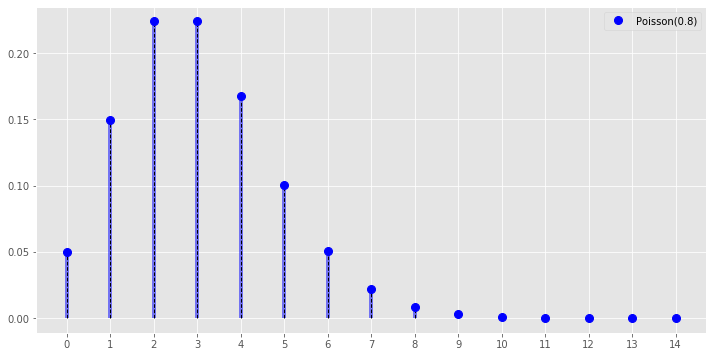

In [20]:
plt.figure(figsize=(15,8))
fig, ax = plt.subplots(1,1,figsize=(12,6))
x  = np.arange(0,15)
ax.plot(x, poisson.pmf(x,mu), "bo", ms=8,label=r"Poisson(0.8)")
ax.vlines(x, 0, poisson.pmf(x,mu), colors="b", lw=4,alpha=0.5)
 # En los puntos x's donde la línea empieza en 0 y termina en poisson.pmf(x,mu)
plt.legend(loc="best", frameon=True) 
plt.legend(loc="best", frameon=True)


rv = poisson(mu) #Distribución poisson
ax.vlines(x,0,rv.pmf(x), color="k", linestyle="--",lw=1,)
plt.xticks([l/2 for l in range(0,30,2)])
plt.show()

### Distribución Binomial Negativa
Si $X$ es una variable aleatoria que mide el "número de repeticiones hasta observar los $r$ éxitos en ensayos de `Bernoulli`, diremos que $X$ se distribuye como una Binomial Negativa con parámetros$r$ y $p$,
$$X \sim \text{BN}(r,p)$$
donde $p$ es la probabiliad de éxito

- El **dominio** de $X$ será $D_x = \{r,r+1,r+2,\dots\}$
- La **función de densidad** vendrá dada por 
$$f(k) = {k-1 \choose r-1}p^r(1-p)^{k-r}, k \ge r$$

- La **función de distribución** no tiene una expresión analítica.

- **Esperanza** $ E(x) = \frac{r}{p}$
- **Varianza** $Var(x) = r\frac{1-p}{p^2}$

In [21]:
from scipy.stats import nbinom

In [22]:
n = 5 # Casos exitos
p = 0.5 # Porbabilidad
mean, var, skew, kurt = nbinom.stats(n,p,moments="mvsk")
print("Media: %f"%mean) 
print("Var: %f"%var)
print("Skew:  %f"%skew)
print("Kurt:  %f"%kurt)

Media: 5.000000
Var: 10.000000
Skew:  0.948683
Kurt:  1.300000


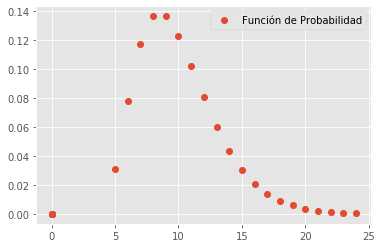

In [23]:
fig,ax = plt.subplots(1,1)
intentos = 20
exitos = 5
p=0.5
x=np.concatenate((np.zeros(exitos), np.arange(exitos,intentos+exitos)))
nbino= np.concatenate((np.zeros(exitos),nbinom.pmf(range(0,20),5,0.5)))
ax.plot(x,nbino,"o",label="Función de Probabilidad")
ax.legend(loc="best")
plt.show()

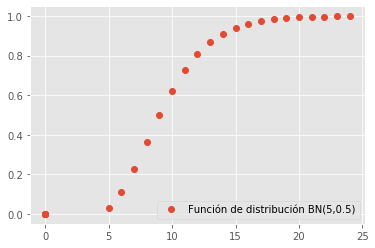

In [24]:
fig,ax = plt.subplots(1,1)
intentos = 20
exitos = 5
p=0.5
x=np.concatenate((np.zeros(exitos), np.arange(exitos,intentos+exitos)))
nbino= np.concatenate((np.zeros(exitos),nbinom.cdf(range(0,20),5,0.5)))
ax.plot(x,nbino,"o",label="Función de distribución BN(5,0.5)")
ax.legend(loc="best")
plt.show() 

In [25]:
# Mediana
5 + nbinom.ppf(0.5,5,0.5) # Le sumamos 5 porque los primeros 5 no pueden ser éxitos

9.0

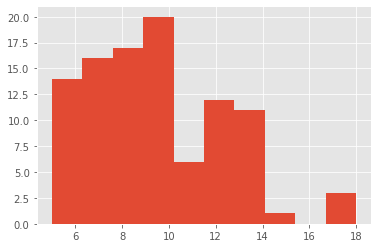

In [26]:
plt.hist([nbinom.rvs(5, 0.5)+5 for _ in range(100)])
plt.show()

Distribución |  Instrucción en R  |  Instrucción en Python  |  Parámetros                                
--------------------|--------------------|--------------------|--------------------
Bernoulli | `bern` | `scipy.stats.bernoulli` | probabilidad de éxito $p$
Binomial | `binom` | `scipy.stats.binom` | tamaño de la muestra $n$ y probabilidad de éxito $p$
Geométrica | `geom` | `scipy.stats.geom` | probabilidad de éxito $p$
Hipergeométrica | `hyper` | `scipy.stats.hypergeom` | $N,M,n$
Poisson | `pois` | `scipy.stats.poisson` | esperanza $\lambda$
Binomial Negativa | `nbinom` | `scipy.stats.nbinom` | número de éxitos $r$ y probabilidad de éxito $p$
